# Load packages

In [2]:
import scanpy as sc

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# # show figures in the notebook
%matplotlib inline 


sc.settings.set_figure_params(dpi=200) # save umaps as non-vectorial hi-res images
# plt.rcParams['figure.figsize']=(10,10) # make figures square if not using the setting bellow
sc.set_figure_params(frameon=False)

In [3]:
import sys
sys.path.append('/data/angela/src/scVI_TSP/')
sys.path.append('/data/angela/sapiens/tabula-sapiens/')
# from utils.annotations_utils import *
from utils.colorDict import *
from utils.general_utils import *
from utils.plotting_utils import *

# Load data

In [4]:
adata = sc.read_h5ad(
    "/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/v2_july_2021/TabulaSapiens.h5ad"
)
adata

AnnData object with n_obs × n_vars = 481120 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'compartment_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [5]:
set(adata.obs.compartment)

{'endothelial', 'epithelial', 'germ line', 'immune', 'stromal'}

In [6]:
adata

AnnData object with n_obs × n_vars = 481120 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'compartment_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [7]:
set(adata.obs["organ_tissue"])

{'Bladder',
 'Blood',
 'Bone_Marrow',
 'Eye',
 'Fat',
 'Heart',
 'Kidney',
 'Large_Intestine',
 'Liver',
 'Lung',
 'Lymph_Node',
 'Mammary',
 'Muscle',
 'Pancreas',
 'Prostate',
 'Salivary_Gland',
 'Skin',
 'Small_Intestine',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea',
 'Uterus',
 'Vasculature'}

In [52]:
intestine = adata[adata.obs['organ_tissue'].isin(["Large_Intestine","Small_Intestine"])].copy()
intestine = intestine[intestine.obs['donor']=="TSP14"].copy()
intestine.obs["tissue_location"] = intestine.obs["organ_tissue"].astype(str) + "_" + intestine.obs["anatomical_information"].astype(str)
intestine

AnnData object with n_obs × n_vars = 21897 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender', 'tissue_location'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [33]:
# intestine.obs["tissue_location"] = intestine.obs["organ_tissue"].astype(str) + "_" + intestine.obs["anatomical_information"].astype(str)



Trying to set attribute `.obs` of view, copying.


In [53]:
set(intestine.obs["donor"])

{'TSP14'}

In [54]:
instestine = remove_cats(intestine)

In [12]:
intestine.obs

,organ_tissue,method,donor,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,gender,tissue_location
cell_id,,,,,,,,,,,,
AAACCCAAGCGCCTTG_TSP14_LI_Distal_10X_1_1,Large_Intestine,10X,TSP14,Distal,4572.0,1490,"cd4-positive, alpha-beta t cell",cd4-positive alpha-beta T cell,True,immune,male,Large_Intestine_Distal
AAACCCACACTTGGGC_TSP14_LI_Distal_10X_1_1,Large_Intestine,10X,TSP14,Distal,12874.0,1466,enterocyte of epithelium of large intestine,immature enterocyte,True,epithelial,male,Large_Intestine_Distal
AAACCCACATTCAGCA_TSP14_LI_Distal_10X_1_1,Large_Intestine,10X,TSP14,Distal,4400.0,1666,monocyte,monocyte,True,immune,male,Large_Intestine_Distal
AAACCCAGTATCTTCT_TSP14_LI_Distal_10X_1_1,Large_Intestine,10X,TSP14,Distal,13988.0,2319,enterocyte of epithelium of large intestine,immature enterocyte,True,epithelial,male,Large_Intestine_Distal
AAACCCAGTGGTATGG_TSP14_LI_Distal_10X_1_1,Large_Intestine,10X,TSP14,Distal,6641.0,1372,enterocyte of epithelium of large intestine,immature enterocyte,True,epithelial,male,Large_Intestine_Distal
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGCCGCTTG_TSP14_SI_Proximal_10X_1_1,Small_Intestine,10X,TSP14,Proximal,5269.0,1608,"cd4-positive, alpha-beta t cell",Cd4-positive alpha-beta T cell,True,immune,male,Small_Intestine_Proximal
TTTGTTGAGGATAATC_TSP14_SI_Proximal_10X_1_1,Small_Intestine,10X,TSP14,Proximal,5112.0,1571,"cd4-positive, alpha-beta t cell",Cd4-positive alpha-beta T cell,True,immune,male,Small_Intestine_Proximal
TTTGTTGAGTGCAGCA_TSP14_SI_Proximal_10X_1_1,Small_Intestine,10X,TSP14,Proximal,5402.0,1635,"cd4-positive, alpha-beta t cell",Cd4-positive alpha-beta T cell,True,immune,male,Small_Intestine_Proximal


In [13]:
intestine

AnnData object with n_obs × n_vars = 21897 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender', 'tissue_location'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

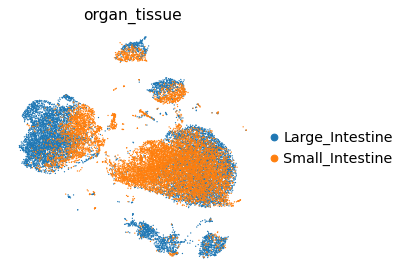

In [56]:
# sc.pp.neighbors(intestine, use_rep="X_scvi")
sc.tl.umap(intestine)
sc.pl.umap(intestine,color="organ_tissue")

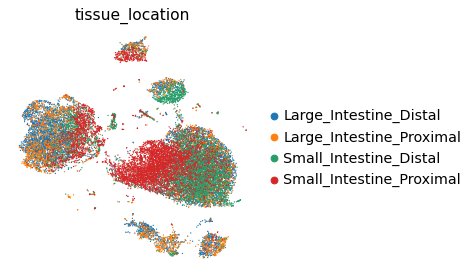

In [57]:
sc.pl.umap(intestine,color="tissue_location")

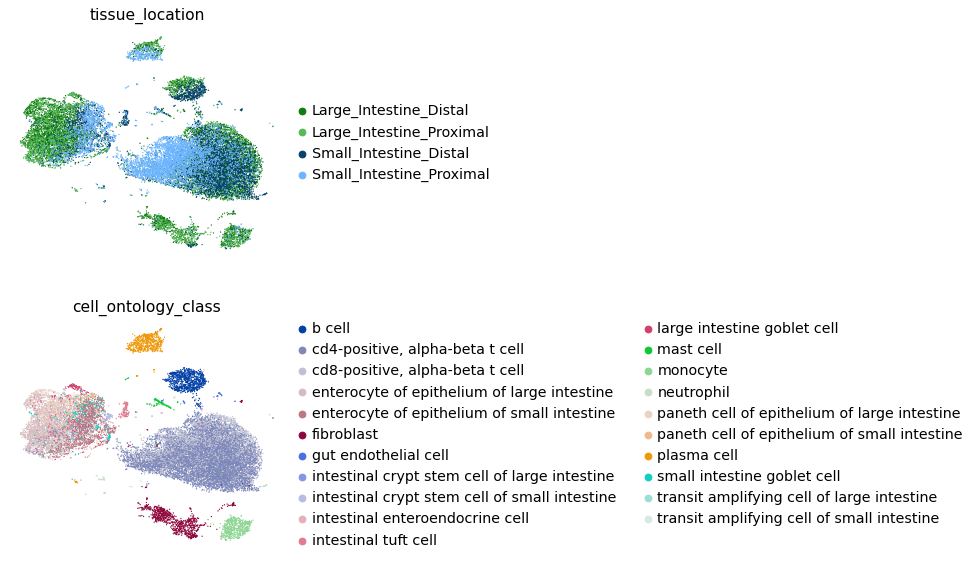

In [59]:
intestine.uns["tissue_location_colors"] = ['#107c10', '#57b956', '#064168', '#6db6ff']
# ['#1f77b4', '#ff7f0e', '#279e68', '#d62728']
sc.pl.umap(
    intestine,
    color=["tissue_location", "cell_ontology_class"],
    ncols = 1,
    save="_intestine_all-cells.pdf"
                     )

In [60]:
set(intestine.obs["cell_ontology_class"])

{'b cell',
 'cd4-positive, alpha-beta t cell',
 'cd8-positive, alpha-beta t cell',
 'enterocyte of epithelium of large intestine',
 'enterocyte of epithelium of small intestine',
 'fibroblast',
 'gut endothelial cell',
 'intestinal crypt stem cell of large intestine',
 'intestinal crypt stem cell of small intestine',
 'intestinal enteroendocrine cell',
 'intestinal tuft cell',
 'large intestine goblet cell',
 'mast cell',
 'monocyte',
 'neutrophil',
 'paneth cell of epithelium of large intestine',
 'paneth cell of epithelium of small intestine',
 'plasma cell',
 'small intestine goblet cell',
 'transit amplifying cell of large intestine',
 'transit amplifying cell of small intestine'}

In [61]:
intestine = adata[adata.obs['organ_tissue'].isin(["Large_Intestine","Small_Intestine"])].copy()
intestine = intestine[intestine.obs['donor']=="TSP14"].copy()
intestine.obs["tissue_location"] = intestine.obs["organ_tissue"].astype(str) + "_" + intestine.obs["anatomical_information"].astype(str)

intestine_tcells = intestine[
    intestine.obs["cell_ontology_class"].isin(
        ['cd4-positive, alpha-beta t cell','cd8-positive, alpha-beta t cell']
    )].copy()
intestine_tcells


AnnData object with n_obs × n_vars = 12465 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender', 'tissue_location'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

... storing 'tissue_location' as categorical


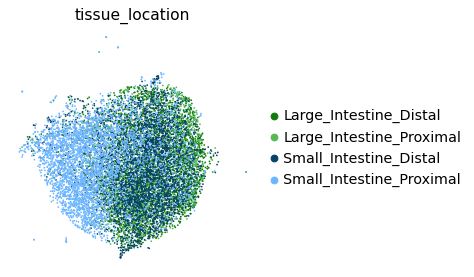

In [62]:
# sc.pp.neighbors(intestine_tcells, use_rep="X_scvi")
sc.tl.umap(intestine_tcells)
intestine_tcells.uns["tissue_location_colors"] = ['#107c10', '#57b956', '#064168', '#6db6ff']
# ['#1f77b4', '#ff7f0e', '#279e68', '#d62728']
sc.pl.umap(intestine_tcells,color="tissue_location", save="_intestine_t-cells.pdf")

In [63]:
intestine = adata[adata.obs['organ_tissue'].isin(["Large_Intestine","Small_Intestine"])].copy()
intestine = intestine[intestine.obs['donor']=="TSP14"].copy()
intestine.obs["tissue_location"] = intestine.obs["organ_tissue"].astype(str) + "_" + intestine.obs["anatomical_information"].astype(str)

intestine_epithelial_tcell = intestine[
    intestine.obs["cell_ontology_class"].isin(
        [
            'cd4-positive, alpha-beta t cell',
            'cd8-positive, alpha-beta t cell',
            'enterocyte of epithelium of large intestine',
            'enterocyte of epithelium of small intestine',
            'intestinal crypt stem cell of large intestine',
            'intestinal crypt stem cell of small intestine',
            'intestinal enteroendocrine cell',
            'intestinal tuft cell',
            'large intestine goblet cell',
            'paneth cell of epithelium of large intestine',
            'paneth cell of epithelium of small intestine',
            'small intestine goblet cell',
            'transit amplifying cell of large intestine',
            'transit amplifying cell of small intestine'
        ]
    )].copy()
intestine_epithelial_tcell


AnnData object with n_obs × n_vars = 18575 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender', 'tissue_location'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

... storing 'tissue_location' as categorical


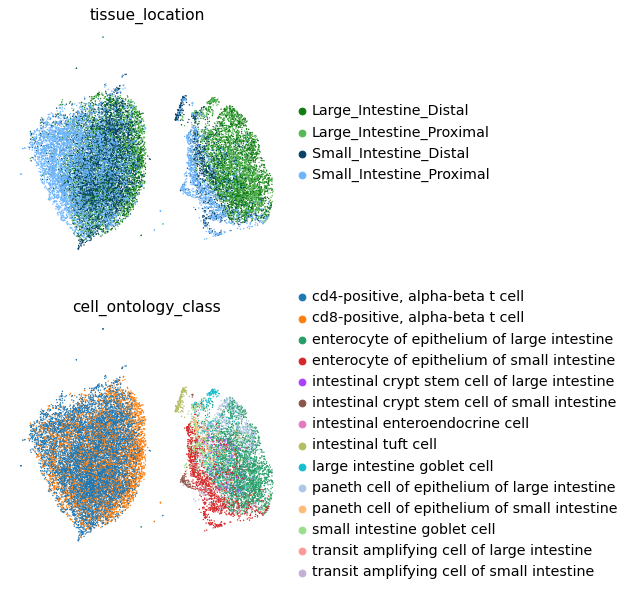

In [64]:
# sc.pp.neighbors(intestine_epithelial_tcell, use_rep="X_scvi")
sc.tl.umap(intestine_epithelial_tcell)
intestine_epithelial_tcell.uns["tissue_location_colors"] = ['#107c10', '#57b956', '#064168', '#6db6ff']
# ['#1f77b4', '#ff7f0e', '#279e68', '#d62728']
sc.pl.umap(
    intestine_epithelial_tcell,color=["tissue_location","cell_ontology_class"], 
    ncols=1,
    save="_intestine_epithelial_t-cells.pdf"
)

In [65]:
intestine = adata[adata.obs['organ_tissue'].isin(["Large_Intestine","Small_Intestine"])].copy()
intestine = intestine[intestine.obs['donor']=="TSP14"].copy()
intestine.obs["tissue_location"] = intestine.obs["organ_tissue"].astype(str) + "_" + intestine.obs["anatomical_information"].astype(str)

intestine_epithelial = intestine[
    intestine.obs["cell_ontology_class"].isin(
        [
            'enterocyte of epithelium of large intestine',
            'enterocyte of epithelium of small intestine',
            'intestinal crypt stem cell of large intestine',
            'intestinal crypt stem cell of small intestine',
            'intestinal enteroendocrine cell',
            'intestinal tuft cell',
            'large intestine goblet cell',
            'paneth cell of epithelium of large intestine',
            'paneth cell of epithelium of small intestine',
            'small intestine goblet cell',
            'transit amplifying cell of large intestine',
            'transit amplifying cell of small intestine'
        ]
    )].copy()
intestine_epithelial


AnnData object with n_obs × n_vars = 6110 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender', 'tissue_location'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

... storing 'tissue_location' as categorical


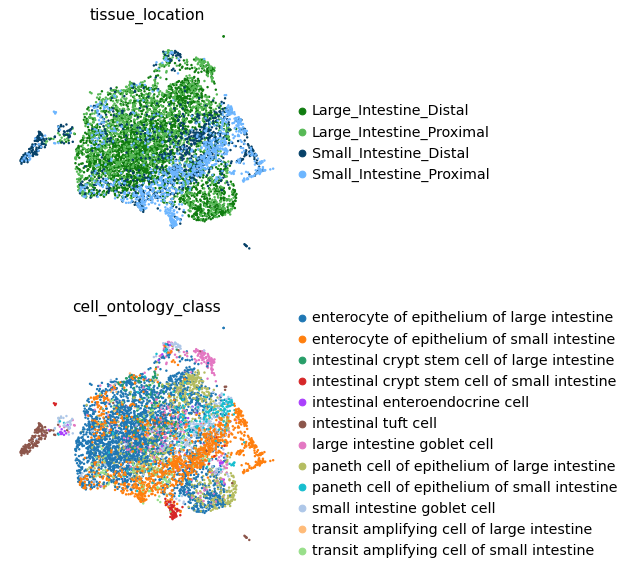

In [66]:
# sc.pp.neighbors(intestine_epithelial, use_rep="X_scvi")
sc.tl.umap(intestine_epithelial)
intestine_epithelial.uns["tissue_location_colors"] = ['#107c10', '#57b956', '#064168', '#6db6ff']
# ['#1f77b4', '#ff7f0e', '#279e68', '#d62728']
sc.pl.umap(
    intestine_epithelial,color=["tissue_location","cell_ontology_class"], 
    ncols=1,
    save="_intestine_epithelial_cells.pdf"
)

# Compute cellular fractions

In [12]:
def tiss_cell_fractions(adata,
                        technology_col='method', # this makes separate plots
                        breakby='tissue', # this makes separate plots
                        category='cell_ontology_class',
                        dataset="Pilot2",
                        groupby = "donor"):
    
    
#     import sys
#     sys.path.append('/home/angela/sapiens/tabula-sapiens/')
#     from utils.colorDict import donor_colors
#     donors_color_dict = donor_colors()
    
    for m in set(adata.obs[technology_col]):
        adata_subset = adata[adata.obs[technology_col] == m].copy()
        adata_subset = remove_cats(adata_subset)
        for t in set(adata_subset.obs[breakby]):
            print(t)
            tiss = adata_subset[adata_subset.obs[breakby] == t].copy()
            tiss = remove_cats(tiss)

#             aux = tiss.obs.groupby([category,groupby]).count()
#             aux = pd.DataFrame(aux).reset_index()
#             aux['fraction'] = aux[aux.columns[1]]/aux[aux.columns[1]].sum()
#             aux['cell_number'] = aux[aux.columns[1]]
            aux = tiss.obs.groupby([category,groupby])['method'].count()
            aux = pd.DataFrame(aux).reset_index()
            aux['fraction'] = aux['method']/aux['method'].sum()
            aux['cell_number'] = aux['method']

#             aux[[category,'fraction','cell_number']].to_csv("./cell_fractions/"+dataset+"_"+m+"_"+t+'.csv')

            f, ax = plt.subplots(figsize=(15,10)) 
            g = sns.barplot(data = aux, y = 'fraction',x = category, 
                            hue = groupby,#palette=donors_color_dict,
                            ax = ax)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
            ax.set(xlabel= dataset +" "+ t +' cell types', ylabel='Relative abundance in'+ m +' data');
            plt.tight_layout()
            plt.savefig("/data/angela/sapiens/tabula-sapiens/analysis-scripts/"+m+'.pdf')

In [13]:
pwd

'/data/angela/sapiens/tabula-sapiens/analysis-scripts/single_cell_microbiome_analysis'

In [14]:
set(instestine.obs["cell_ontology_class"])

{'b cell',
 'cd4-positive, alpha-beta t cell',
 'cd8-positive, alpha-beta t cell',
 'enterocyte of epithelium of large intestine',
 'enterocyte of epithelium of small intestine',
 'fibroblast',
 'gut endothelial cell',
 'intestinal crypt stem cell of large intestine',
 'intestinal crypt stem cell of small intestine',
 'intestinal enteroendocrine cell',
 'intestinal tuft cell',
 'large intestine goblet cell',
 'mast cell',
 'monocyte',
 'neutrophil',
 'paneth cell of epithelium of large intestine',
 'paneth cell of epithelium of small intestine',
 'plasma cell',
 'small intestine goblet cell',
 'transit amplifying cell of large intestine',
 'transit amplifying cell of small intestine'}

In [15]:
intestine.obs["anatomical_information"] = intestine.obs["anatomical_information"].str.lower()
intestine = intestine[intestine.obs["anatomical_information"].isin(["distal","proximal"])].copy()

Large_Intestine
Small_Intestine


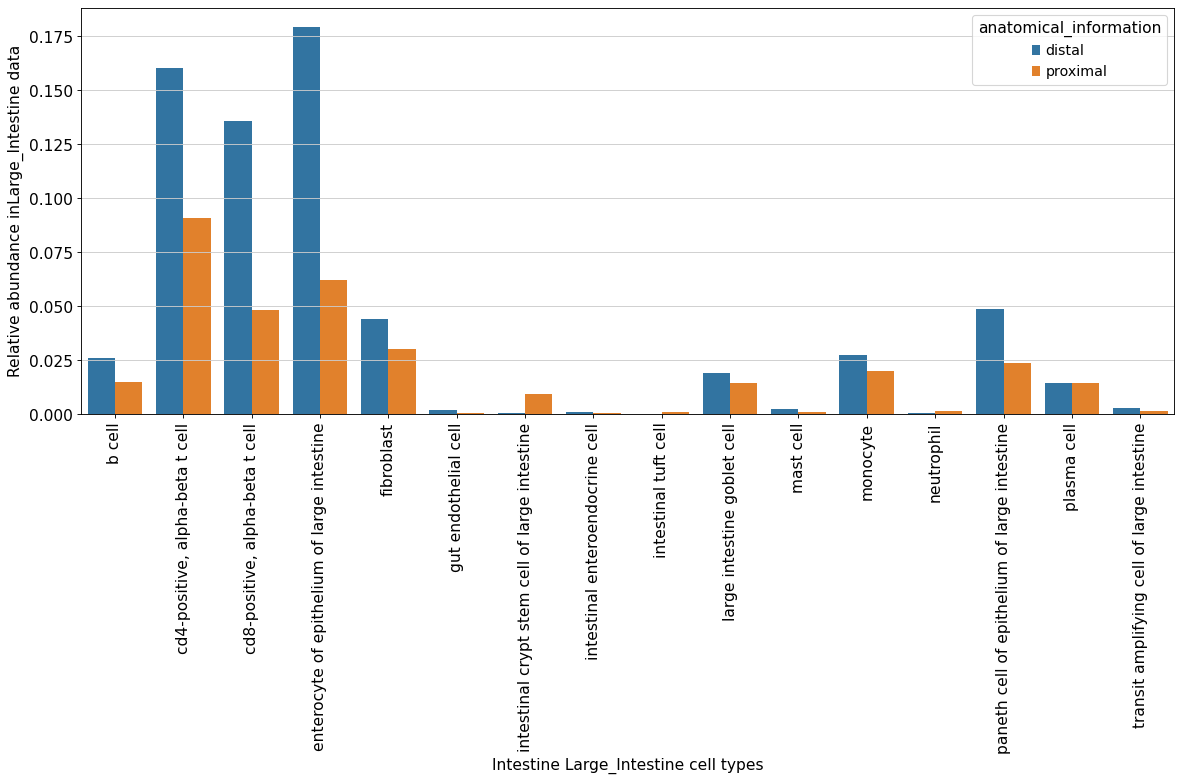

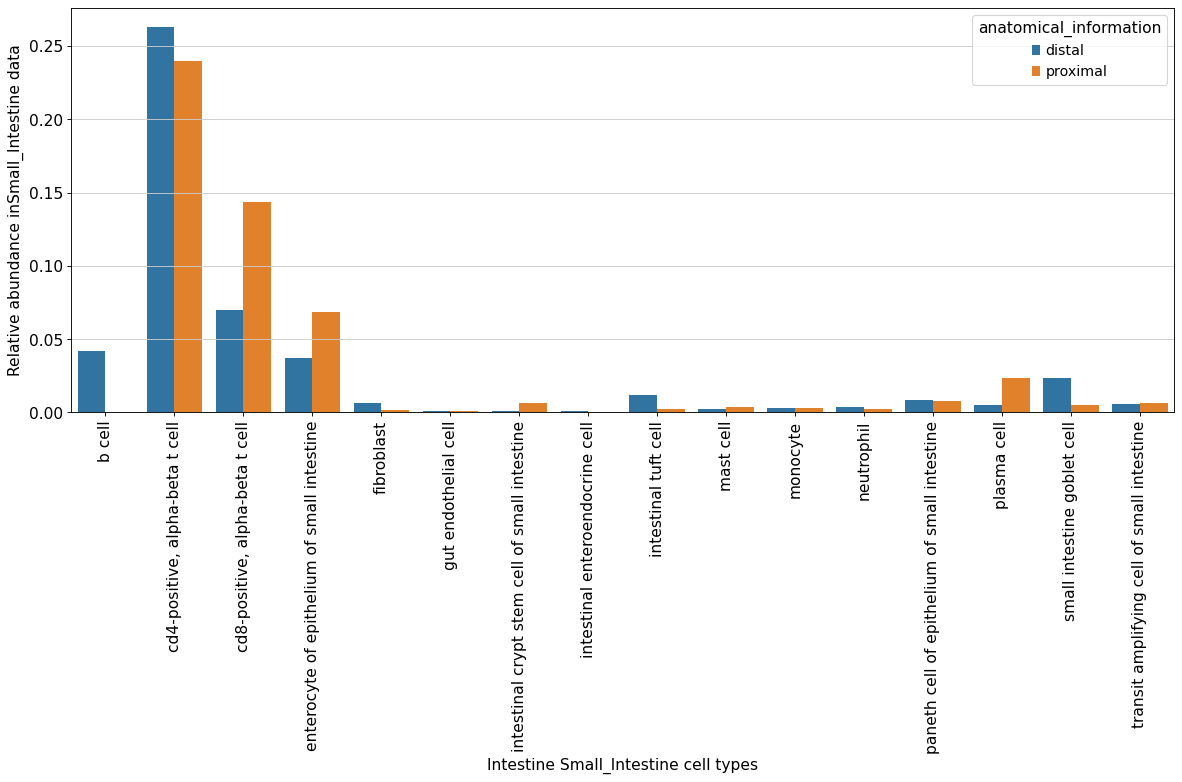

In [16]:
tiss_cell_fractions(intestine,
                        technology_col='organ_tissue', # this makes separate plots
                        breakby='organ_tissue', # this makes separate plots
                        category='cell_ontology_class',
                        dataset="Intestine",
                        groupby = "anatomical_information")

# Do DGE and pathway analysis

## Load required packages

In [17]:
import gseapy as gp
from gseapy.plot import barplot, dotplot
from bioinfokit import analys, visuz


In [18]:
gseapy_gene_sets = gp.get_library_name(database='Human') # default: Human
gseapy_gene_sets

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbati

In [19]:
# do DGE, pathway analysis, volcan plots

# use for epithelial cells:
# enterocyte, paneth cell (professional antimicrobial secreters) -- run separate

# use for immune:
# cd4, cd8 -- run in separate

# proximal vs distal for large and small
# large vs small as a whole

## All cells, large vs small intestine

In [32]:
# 1. run DGE
sc.tl.rank_genes_groups(intestine, "organ_tissue",method="wilcoxon")


# 2. make dataframe with results
result = intestine.uns['rank_genes_groups']
groups = result['names'].dtype.names
large_vs_small = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges','pvals_adj']})
large_vs_small.to_csv("./dge/large_vs_small/large_vs_small_all_cells.csv")

large_vs_small['Large_Intestine_l'] = large_vs_small['Large_Intestine_l'].clip(-6, 6)
large_vs_small['Large_Intestine_p'] = large_vs_small['Large_Intestine_p'].clip(1e-100,1)
visuz.gene_exp.volcano(
    df=large_vs_small, lfc='Large_Intestine_l', pv='Large_Intestine_p',
    figname="./dge/large_vs_small/large_vs_small_all_cells", #show=True,
    color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, legendpos='upper right', 
    legendanchor=(1.5,1), sign_line=True, 
)


# 3. filter DGE
sc.tl.filter_rank_genes_groups(intestine, min_fold_change=.7)
result = intestine.uns['rank_genes_groups_filtered']
groups = result['names'].dtype.names
large_vs_small = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges']})

# 4. select which gene sets to use

gene_sets = [
    'BioCarta_2013',
    'BioCarta_2015',
    'BioCarta_2016',
    'Elsevier_Pathway_Collection',
    'GO_Biological_Process_2013',
    'GO_Biological_Process_2015',
    'GO_Biological_Process_2017',
    'GO_Biological_Process_2017b',
    'GO_Biological_Process_2018',
    'GO_Biological_Process_2021',
    'GO_Cellular_Component_2013',
    'GO_Cellular_Component_2015',
    'GO_Cellular_Component_2017',
    'GO_Cellular_Component_2017b',
    'GO_Cellular_Component_2018',
    'GO_Cellular_Component_2021',
    'GO_Molecular_Function_2013',
    'GO_Molecular_Function_2015',
    'GO_Molecular_Function_2017',
    'GO_Molecular_Function_2017b',
    'GO_Molecular_Function_2018',
    'GO_Molecular_Function_2021',
    'GeneSigDB',
    'KEGG_2013',
    'KEGG_2015',
    'KEGG_2016',
    'KEGG_2019_Human',
    'KEGG_2021_Human',
    'Reactome_2013',
    'Reactome_2015',
    'Reactome_2016',
    'WikiPathway_2021_Human',
    'WikiPathways_2013',
    'WikiPathways_2015',
    'WikiPathways_2016',
    'WikiPathways_2019_Human',
] # or a '' or a ["",""]



# 5. Enrichr analysis 
for c in large_vs_small.columns[0::2]:    
    glist=list(large_vs_small[c].dropna())
    
    enr = gp.enrichr(gene_list=glist,
                 gene_sets=gene_sets,#['KEGG_2016','KEGG_2013'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 description='test_name',
                 outdir='enrichr/large_vs_small/all/'+c.rsplit("_",1)[0],
                 # no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )
    # to save your figure, make sure that ``ofname`` is not None
    enr.results[enr.results["Adjusted P-value"]<.05].to_csv(
        "./dge/large_vs_small/large_vs_small_all_cells_"+c.rsplit("_",1)[0]+"_enrichment_analysis.csv")

#     barplot(enr.res2d,title=c)
#     dotplot(enr.res2d, title=c,cmap='viridis_r')

            
# 6. GSEA/prerank analysis 
for c in large_vs_small.columns[0::2]:    
    rnk=large_vs_small[[c,c.rsplit("_",1)[0]+"_l"]].dropna()
    
    # run prerank
    # enrichr libraries are supported by prerank module. Just provide the name
    # use 4 process to acceralate the permutation speed

    # note: multiprocessing may not work on windows
    df = pd.DataFrame()
    for p in gene_sets:
        try:
            pre_res = gp.prerank(rnk=rnk, 
                                 gene_sets=p,#'GO_Biological_Process_2021',
                                 processes=10,
                                 permutation_num=100, # reduce number to speed up testing
                                 outdir='gsea_prerank/large_vs_small/all/'+c.rsplit("_",1)[0], format='png', seed=6)

            df_aux = pd.DataFrame(pre_res.results).transpose().sort_values(by="es",ascending=False)
            df_aux.index = p+"_"+df_aux.index

            df = pd.concat([df,df_aux])
        except:
            print("no enrichment for ", p)
        
    df[df["pval"]<.05].to_csv("./dge/large_vs_small/large_vs_small_all_cells_"+c.rsplit("_",1)[0]+"_gsea_analysis.csv")
        
        






/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
2021-09-14 13:03:05,613 Warning: No enrich terms using library Reactome_2013 when cutoff = 0.5
2021-09-14 13:05:09,441 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 13:05:10,008 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 13:05:10,600 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 13:05:11,545 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 13:05:18,266 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 13:05:49,404 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 13:05:50,081 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 13:05:51,478 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 13:05:52,250 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 13:05:53,064 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 13:06:05,321 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:06:05,383 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 13:06:05,536 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2016


2021-09-14 13:06:06,270 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 13:06:06,994 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:06:07,034 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 13:06:07,486 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 13:06:10,177 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:06:10,304 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 13:06:11,755 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human


2021-09-14 13:06:12,371 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 13:06:14,233 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 13:09:38,661 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2015


## Each cell type, large vs small intestine

In [21]:
set(intestine.obs["cell_ontology_class"])

{'b cell',
 'cd4-positive, alpha-beta t cell',
 'cd8-positive, alpha-beta t cell',
 'enterocyte of epithelium of large intestine',
 'enterocyte of epithelium of small intestine',
 'fibroblast',
 'gut endothelial cell',
 'intestinal crypt stem cell of large intestine',
 'intestinal crypt stem cell of small intestine',
 'intestinal enteroendocrine cell',
 'intestinal tuft cell',
 'large intestine goblet cell',
 'mast cell',
 'monocyte',
 'neutrophil',
 'paneth cell of epithelium of large intestine',
 'paneth cell of epithelium of small intestine',
 'plasma cell',
 'small intestine goblet cell',
 'transit amplifying cell of large intestine',
 'transit amplifying cell of small intestine'}

In [33]:
cell_ontology_class_groups = [
    ['b cell'],
    ['cd4-positive, alpha-beta t cell','cd8-positive, alpha-beta t cell'],
    ['enterocyte of epithelium of large intestine','enterocyte of epithelium of small intestine'],
    ['fibroblast'],
    ['gut endothelial cell'],
    ['intestinal crypt stem cell of large intestine','intestinal crypt stem cell of small intestine'],
    ['intestinal enteroendocrine cell'],
    ['intestinal tuft cell'],
    ['mast cell'],
    ['monocyte'],
    ['neutrophil'],
    ['paneth cell of epithelium of large intestine','paneth cell of epithelium of small intestine'],
    ['plasma cell'],
    ['small intestine goblet cell','large intestine goblet cell'],
    ['transit amplifying cell of large intestine','transit amplifying cell of small intestine']
]

cell_ontology_class_groups_dict = {
    tuple(['b cell']):"bcell",
    tuple(['cd4-positive, alpha-beta t cell','cd8-positive, alpha-beta t cell']):"tcell",
    tuple(['enterocyte of epithelium of large intestine','enterocyte of epithelium of small intestine']):"enterocyte",
    tuple(['fibroblast']):"fibroblast",
    tuple(['gut endothelial cell']):"endothelial",
    tuple(['intestinal crypt stem cell of large intestine','intestinal crypt stem cell of small intestine']):"crypt_stem_cell",
    tuple(['intestinal enteroendocrine cell']):"enteroendocrine",
    tuple(['intestinal tuft cell']):"tuft_cell",
    tuple(['mast cell']):"mastcell",
    tuple(['monocyte']):"monocyte",
    tuple(['neutrophil']):"neutrophil",
    tuple(['paneth cell of epithelium of large intestine','paneth cell of epithelium of small intestine']):"paneth",
    tuple(['plasma cell']):"plasmacell",
    tuple(['small intestine goblet cell','large intestine goblet cell']):"globetcell",
    tuple(['transit amplifying cell of large intestine','transit amplifying cell of small intestine']):"transit_amplifying_cell"
}

for ct in cell_ontology_class_groups:
    ct_intestine = intestine[intestine.obs["cell_ontology_class"].isin(ct)].copy()
    print(ct)

    print("1. run DGE")
    sc.tl.rank_genes_groups(ct_intestine, "organ_tissue",method="wilcoxon")


    print("2. make dataframe with results")
    result = ct_intestine.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    large_vs_small = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'logfoldchanges','pvals_adj']})
    large_vs_small.to_csv("./dge/large_vs_small/large_vs_small_"+cell_ontology_class_groups_dict[tuple(ct)]+".csv")

    large_vs_small['Large_Intestine_l'] = large_vs_small['Large_Intestine_l'].clip(-6, 6)
    large_vs_small['Large_Intestine_p'] = large_vs_small['Large_Intestine_p'].clip(1e-100,1)
    
    try:
        visuz.gene_exp.volcano(
            df=large_vs_small, lfc='Large_Intestine_l', pv='Large_Intestine_p',
            figname="./dge/large_vs_small/large_vs_small_"+cell_ontology_class_groups_dict[tuple(ct)], #show=True,
            color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, legendpos='upper right', 
            legendanchor=(1.5,1), sign_line=True, 
        )
    except:
        print("there are no significant dge between large and small for ",cell_ontology_class_groups_dict[tuple(ct)])


    print("3. filter DGE")
    sc.tl.filter_rank_genes_groups(ct_intestine, min_fold_change=.7)
    result = ct_intestine.uns['rank_genes_groups_filtered']
    groups = result['names'].dtype.names
    large_vs_small = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'logfoldchanges']})

    
    print("4. select which gene sets to use")

    gene_sets = [
        'BioCarta_2013',
        'BioCarta_2015',
        'BioCarta_2016',
        'Elsevier_Pathway_Collection',
        'GO_Biological_Process_2013',
        'GO_Biological_Process_2015',
        'GO_Biological_Process_2017',
        'GO_Biological_Process_2017b',
        'GO_Biological_Process_2018',
        'GO_Biological_Process_2021',
        'GO_Cellular_Component_2013',
        'GO_Cellular_Component_2015',
        'GO_Cellular_Component_2017',
        'GO_Cellular_Component_2017b',
        'GO_Cellular_Component_2018',
        'GO_Cellular_Component_2021',
        'GO_Molecular_Function_2013',
        'GO_Molecular_Function_2015',
        'GO_Molecular_Function_2017',
        'GO_Molecular_Function_2017b',
        'GO_Molecular_Function_2018',
        'GO_Molecular_Function_2021',
        'GeneSigDB',
        'KEGG_2013',
        'KEGG_2015',
        'KEGG_2016',
        'KEGG_2019_Human',
        'KEGG_2021_Human',
        'Reactome_2013',
        'Reactome_2015',
        'Reactome_2016',
        'WikiPathway_2021_Human',
        'WikiPathways_2013',
        'WikiPathways_2015',
        'WikiPathways_2016',
        'WikiPathways_2019_Human',
    ] # or a '' or a ["",""]



    print("5. Enrichr analysis")
    for c in large_vs_small.columns[0::2]:
        print(c)
        glist=list(large_vs_small[c].dropna())

        enr = gp.enrichr(gene_list=glist,
                     gene_sets=gene_sets,#['KEGG_2016','KEGG_2013'],
                     organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                     description='test_name',
                     outdir='enrichr/large_vs_small/'+cell_ontology_class_groups_dict[tuple(ct)]+"/"+c.rsplit("_",1)[0],
                     # no_plot=True,
                     cutoff=0.5 # test dataset, use lower value from range(0,1)
                    )
        # to save your figure, make sure that ``ofname`` is not None
        enr.results[enr.results["Adjusted P-value"]<.05].to_csv(
            "./dge/large_vs_small/large_vs_small_all_cells_"+c.rsplit("_",1)[0]+"_"+cell_ontology_class_groups_dict[tuple(ct)]+"_enrichment_analysis.csv"
        )


    print("6. GSEA/prerank analysis")
    for c in large_vs_small.columns[0::2]:
        print(c)    
        rnk=large_vs_small[[c,c.rsplit("_",1)[0]+"_l"]].dropna()

        # run prerank
        # enrichr libraries are supported by prerank module. Just provide the name
        # use 4 process to acceralate the permutation speed

        # note: multiprocessing may not work on windows
        df = pd.DataFrame()
        for p in gene_sets:
            try:
                pre_res = gp.prerank(rnk=rnk, 
                                     gene_sets=p,#'GO_Biological_Process_2021',
                                     processes=10,
                                     permutation_num=100, # reduce number to speed up testing
                                     outdir='gsea_prerank/large_vs_small/'+cell_ontology_class_groups_dict[tuple(ct)]+"/"+c.rsplit("_",1)[0], format='png', seed=6)

                df_aux = pd.DataFrame(pre_res.results).transpose().sort_values(by="es",ascending=False)
                df_aux.index = p+"_"+df_aux.index

                df = pd.concat([df,df_aux])
            except:
                print("no enrichment for ", p)
        try:
            df[df["pval"]<.05].to_csv(
                "./dge/large_vs_small/large_vs_small_all_cells_"+c.rsplit("_",1)[0]+"_"+cell_ontology_class_groups_dict[tuple(ct)]+"_gsea_analysis.csv"
            )
            
        except:
            print("no gsea enrichment for ", cell_ontology_class_groups_dict[tuple(ct)],c.rsplit("_",1)[0])








['b cell']
1. run DGE
2. make dataframe with results
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n
Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 13:14:09,064 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 13:14:09,638 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 13:14:10,202 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 13:14:11,036 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 13:14:11,313 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2013


2021-09-14 13:14:12,468 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 13:14:13,282 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 13:14:15,613 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 13:14:16,844 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 13:14:18,106 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:14:18,238 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021
no enrichment for  GO_Cellular_Component_2013


2021-09-14 13:14:18,439 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 13:14:19,058 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 13:14:20,005 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 13:14:20,629 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 13:14:21,288 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:14:21,466 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021
no enrichment for  GO_Molecular_Function_2013


2021-09-14 13:14:21,716 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 13:14:22,346 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 13:14:23,410 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 13:14:24,105 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 13:14:24,801 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 13:14:25,756 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:14:25,804 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:14:25,843 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:14:25,939 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GeneSigDB
no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 13:14:26,571 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 13:14:27,213 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:14:27,241 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 13:14:27,482 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 13:14:27,845 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 13:14:28,470 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:14:28,503 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:14:28,589 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 13:14:28,678 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 13:14:29,289 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
no gsea enrichment for  bcell Large_Intestine
Small_Intestine_n


2021-09-14 13:14:29,999 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 13:14:32,739 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['cd4-positive, alpha-beta t cell', 'cd8-positive, alpha-beta t cell']
1. run DGE
2. make dataframe with results
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n


2021-09-14 13:22:51,804 Warning: No enrich terms using library BioCarta_2013 when cutoff = 0.5


Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 13:25:50,120 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 13:25:50,682 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 13:25:51,238 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 13:25:52,055 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 13:25:52,333 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2013


2021-09-14 13:25:53,440 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 13:25:54,259 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 13:25:56,566 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 13:25:57,817 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 13:25:59,106 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:25:59,236 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021
no enrichment for  GO_Cellular_Component_2013


2021-09-14 13:25:59,438 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 13:26:00,059 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 13:26:00,992 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 13:26:01,605 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 13:26:02,289 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:26:02,468 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021
no enrichment for  GO_Molecular_Function_2013


2021-09-14 13:26:02,717 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 13:26:03,356 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 13:26:04,403 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 13:26:05,096 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 13:26:05,794 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 13:26:06,827 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:26:06,870 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:26:06,909 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:26:07,007 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GeneSigDB
no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 13:26:07,620 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 13:26:08,273 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:26:08,301 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 13:26:08,547 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 13:26:08,903 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 13:26:09,580 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:26:09,621 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:26:09,737 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 13:26:09,860 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 13:26:10,516 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
no gsea enrichment for  tcell Large_Intestine
Small_Intestine_n


2021-09-14 13:26:11,119 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 13:26:11,724 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 13:26:12,311 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 13:26:13,380 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 13:28:58,182 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:28:58,267 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 13:29:15,904 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:29:16,089 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015
['enterocyte of epithelium of large intestine', 'enterocyte of epithelium of small intestine']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between large and small for  enterocyte
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n


2021-09-14 13:30:45,017 Warning: No enrich terms using library Reactome_2013 when cutoff = 0.5


Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 13:33:11,076 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 13:33:11,692 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 13:33:12,275 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 13:33:13,275 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 13:34:15,324 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 13:34:17,009 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 13:34:34,815 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:34:34,891 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 13:34:36,559 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 13:34:37,325 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:34:37,375 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 13:34:37,889 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 13:34:41,798 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:34:41,858 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013


2021-09-14 13:34:42,017 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:34:42,191 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2015
no enrichment for  WikiPathways_2016


2021-09-14 13:34:42,859 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
Small_Intestine_n


2021-09-14 13:34:43,561 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 13:34:44,180 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 13:34:44,830 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['fibroblast']
1. run DGE
2. make dataframe with results
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n
Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 13:46:47,632 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 13:46:48,194 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 13:46:48,744 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 13:46:49,647 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 13:46:52,184 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 13:46:53,033 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 13:46:55,847 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 13:46:57,247 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 13:46:58,716 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:46:58,886 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021
no enrichment for  GO_Cellular_Component_2013


2021-09-14 13:46:59,126 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 13:46:59,783 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 13:47:00,844 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 13:47:01,565 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 13:47:02,263 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021


2021-09-14 13:47:03,328 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 13:47:03,987 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 13:47:05,178 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 13:47:05,907 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 13:47:06,625 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 13:47:09,783 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:47:09,831 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:47:09,950 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 13:47:10,596 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 13:47:11,276 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:47:11,307 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 13:47:11,610 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 13:47:12,053 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 13:47:12,730 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:47:12,767 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 13:47:12,865 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 13:47:12,971 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 13:47:13,606 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
Small_Intestine_n
['gut endothelial cell']
1. run DGE
2. make dataframe with results
there are no significant dge between large and small for  endothelial
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 14:04:27,180 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 14:04:27,773 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 14:04:28,559 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 14:04:29,807 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 14:07:20,181 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 14:07:20,284 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 14:07:47,373 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2013


2021-09-14 14:07:50,738 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
Small_Intestine_n


2021-09-14 14:07:56,596 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['intestinal crypt stem cell of large intestine', 'intestinal crypt stem cell of small intestine']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between large and small for  crypt_stem_cell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n


2021-09-14 14:19:07,248 Warning: No enrich terms using library GO_Molecular_Function_2013 when cutoff = 0.5
2021-09-14 14:19:46,699 Warning: No enrich terms using library WikiPathways_2013 when cutoff = 0.5


Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 14:29:06,531 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 14:29:07,112 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 14:29:07,684 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 14:29:08,748 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 14:29:12,184 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 14:29:13,231 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 14:29:17,269 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 14:29:19,120 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 14:29:26,662 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 14:29:28,035 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 14:29:28,762 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 14:29:40,642 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 14:29:54,449 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 14:29:54,552 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 14:29:58,548 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 14:29:58,595 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 14:29:59,079 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 14:30:01,617 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 14:30:01,672 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013


2021-09-14 14:30:01,831 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 14:30:01,994 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2015
no enrichment for  WikiPathways_2016


2021-09-14 14:30:02,667 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
Small_Intestine_n
['intestinal enteroendocrine cell']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between large and small for  enteroendocrine
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n
Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 15:12:51,635 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 15:12:55,585 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
Small_Intestine_n


2021-09-14 15:20:17,151 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['intestinal tuft cell']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between large and small for  tuft_cell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n
Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 15:34:22,188 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 15:34:22,894 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 15:34:23,578 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
Small_Intestine_n


2021-09-14 15:41:33,651 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 15:41:34,248 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 15:41:34,885 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['mast cell']
1. run DGE
2. make dataframe with results
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n
Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 15:51:14,583 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 15:51:15,176 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 15:51:15,805 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
Small_Intestine_n


2021-09-14 15:57:07,403 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 15:57:07,982 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 15:57:08,539 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 15:57:09,705 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 15:57:17,274 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 15:57:18,326 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 15:58:21,844 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 15:58:21,913 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 15:58:22,100 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2016


2021-09-14 15:58:22,831 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 15:58:23,627 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 15:58:23,675 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 15:58:24,166 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 15:58:28,941 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 15:58:28,998 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013


2021-09-14 15:58:29,161 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2015


2021-09-14 15:58:29,442 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 15:58:30,178 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
['monocyte']
1. run DGE
2. make dataframe with results
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n
Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 16:02:36,884 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 16:02:37,439 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 16:02:37,997 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 16:02:38,869 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 16:02:41,251 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 16:02:42,139 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 16:02:45,690 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 16:02:47,182 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 16:02:48,704 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021


2021-09-14 16:02:49,859 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 16:02:50,520 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 16:02:51,608 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 16:02:52,318 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 16:02:53,072 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021


2021-09-14 16:02:54,812 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 16:02:55,491 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 16:02:56,743 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 16:02:57,491 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 16:02:58,372 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 16:03:01,553 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:03:01,608 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 16:03:01,771 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2016


2021-09-14 16:03:02,424 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 16:03:03,114 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:03:03,146 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 16:03:03,459 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 16:03:03,910 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 16:03:04,584 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:03:04,622 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:03:04,722 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 16:03:04,831 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 16:03:05,466 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
Small_Intestine_n


2021-09-14 16:03:06,131 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 16:03:08,037 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['neutrophil']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n
Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 16:16:11,185 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 16:16:11,854 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 16:16:12,501 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 16:20:46,178 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:20:46,329 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
Small_Intestine_n


2021-09-14 16:22:01,484 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 16:22:02,106 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 16:22:02,706 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 16:26:28,585 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:26:28,724 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
['paneth cell of epithelium of large intestine', 'paneth cell of epithelium of small intestine']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between large and small for  paneth
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n
Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 16:31:44,744 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 16:31:45,361 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 16:31:46,025 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
Small_Intestine_n


2021-09-14 16:37:47,089 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 16:37:47,699 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 16:37:48,329 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 16:42:30,604 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:42:30,733 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 16:42:46,482 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2013


2021-09-14 16:43:08,261 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2013
['plasma cell']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between large and small for  plasmacell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n
Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 16:46:51,308 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 16:46:51,872 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 16:46:52,441 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 16:46:53,308 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 16:46:57,075 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 16:46:57,945 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 16:47:00,816 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 16:47:02,239 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 16:47:08,285 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 16:47:09,391 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 16:47:10,039 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 16:47:13,906 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 16:47:14,555 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 16:47:15,802 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 16:47:16,521 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 16:47:17,288 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 16:47:27,931 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:47:27,986 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:47:28,112 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 16:47:28,828 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 16:47:29,498 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:47:29,532 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 16:47:29,857 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 16:47:32,086 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:47:32,136 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:47:32,242 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 16:47:32,361 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 16:47:33,004 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
Small_Intestine_n


2021-09-14 16:47:33,638 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 16:47:34,286 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 16:47:34,920 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encounter

/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
2021-09-14 16:52:04,121 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:52:04,290 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encounter

['small intestine goblet cell', 'large intestine goblet cell']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between large and small for  globetcell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n
Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 16:57:23,152 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 16:57:23,735 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 16:57:24,334 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 16:57:25,308 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 16:57:30,569 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 16:57:31,608 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 16:58:17,098 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 16:58:17,824 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 16:58:19,445 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 16:58:38,359 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:58:38,427 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 16:58:38,621 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2016


2021-09-14 16:58:39,408 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 16:58:40,175 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:58:40,222 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 16:58:40,710 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 16:58:43,333 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:58:43,389 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013


2021-09-14 16:58:43,539 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 16:58:43,722 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2015
no enrichment for  WikiPathways_2016


2021-09-14 16:58:44,406 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
Small_Intestine_n


2021-09-14 16:58:45,115 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 16:58:45,767 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 16:58:46,442 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['transit amplifying cell of large intestine', 'transit amplifying cell of small intestine']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between large and small for  transit_amplifying_cell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
Large_Intestine_n


2021-09-14 17:06:39,961 Warning: No enrich terms using library GO_Cellular_Component_2013 when cutoff = 0.5
2021-09-14 17:06:42,124 Warning: No enrich terms using library GO_Cellular_Component_2015 when cutoff = 0.5
2021-09-14 17:06:51,461 Warning: No enrich terms using library GO_Cellular_Component_2021 when cutoff = 0.5
2021-09-14 17:07:15,470 Warning: No enrich terms using library KEGG_2016 when cutoff = 0.5
2021-09-14 17:07:17,570 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.5
2021-09-14 17:07:22,061 Warning: No enrich terms using library Reactome_2013 when cutoff = 0.5
2021-09-14 17:07:33,767 Warning: No enrich terms using library WikiPathways_2015 when cutoff = 0.5
2021-09-14 17:07:35,950 Warning: No enrich terms using library WikiPathways_2016 when cutoff = 0.5


Small_Intestine_n
6. GSEA/prerank analysis
Large_Intestine_n


2021-09-14 17:10:59,063 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 17:10:59,669 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 17:11:00,238 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 17:11:01,116 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 17:11:04,357 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 17:11:05,302 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 17:11:08,521 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 17:11:17,453 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 17:11:18,743 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 17:11:19,423 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 17:11:23,496 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 17:11:24,163 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 17:11:25,573 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 17:11:26,339 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 17:11:27,129 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 17:11:37,174 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:11:37,228 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:11:37,371 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 17:11:38,102 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 17:11:38,797 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:11:38,841 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 17:11:39,219 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 17:11:41,014 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:11:41,060 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:11:41,183 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 17:11:41,318 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 17:11:41,949 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
Small_Intestine_n


2021-09-14 17:11:47,764 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


## All cells, large intestine, proximal vs distal

In [34]:
set(intestine.obs)

{'anatomical_information',
 'cell_ontology_class',
 'compartment',
 'donor',
 'free_annotation',
 'gender',
 'manually_annotated',
 'method',
 'n_counts_UMIs',
 'n_genes',
 'organ_tissue',
 'tissue_location'}

In [37]:
large_intestine = intestine[intestine.obs['organ_tissue']=='Large_Intestine'].copy()
# 1. run DGE
sc.tl.rank_genes_groups(large_intestine, "anatomical_information",method="wilcoxon")


# 2. make dataframe with results
result = large_intestine.uns['rank_genes_groups']
groups = result['names'].dtype.names
proximal_vs_distal = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges','pvals_adj']})
proximal_vs_distal.to_csv("./dge/large_intestine/large_intestine_proximal_vs_distal_all_cells.csv")

proximal_vs_distal['distal_l'] = proximal_vs_distal['distal_l'].clip(-6, 6)
proximal_vs_distal['distal_p'] = proximal_vs_distal['distal_p'].clip(1e-100,1)
visuz.gene_exp.volcano(
    df=proximal_vs_distal.dropna(), lfc='distal_l', pv='distal_p',
    figname="./dge/large_intestine/large_intestine_proximal_vs_distal_all_cells", #show=True,
    color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, legendpos='upper right', 
    legendanchor=(1.5,1), sign_line=True, 
)


# 3. filter DGE
sc.tl.filter_rank_genes_groups(large_intestine, min_fold_change=.7)
result = large_intestine.uns['rank_genes_groups_filtered']
groups = result['names'].dtype.names
proximal_vs_distal = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges']})

# 4. select which gene sets to use

gene_sets = [
    'BioCarta_2013',
    'BioCarta_2015',
    'BioCarta_2016',
    'Elsevier_Pathway_Collection',
    'GO_Biological_Process_2013',
    'GO_Biological_Process_2015',
    'GO_Biological_Process_2017',
    'GO_Biological_Process_2017b',
    'GO_Biological_Process_2018',
    'GO_Biological_Process_2021',
    'GO_Cellular_Component_2013',
    'GO_Cellular_Component_2015',
    'GO_Cellular_Component_2017',
    'GO_Cellular_Component_2017b',
    'GO_Cellular_Component_2018',
    'GO_Cellular_Component_2021',
    'GO_Molecular_Function_2013',
    'GO_Molecular_Function_2015',
    'GO_Molecular_Function_2017',
    'GO_Molecular_Function_2017b',
    'GO_Molecular_Function_2018',
    'GO_Molecular_Function_2021',
    'GeneSigDB',
    'KEGG_2013',
    'KEGG_2015',
    'KEGG_2016',
    'KEGG_2019_Human',
    'KEGG_2021_Human',
    'Reactome_2013',
    'Reactome_2015',
    'Reactome_2016',
    'WikiPathway_2021_Human',
    'WikiPathways_2013',
    'WikiPathways_2015',
    'WikiPathways_2016',
    'WikiPathways_2019_Human',
] # or a '' or a ["",""]



# 5. Enrichr analysis 
for c in proximal_vs_distal.columns[0::2]:    
    glist=list(proximal_vs_distal[c].dropna())
    
    enr = gp.enrichr(gene_list=glist,
                 gene_sets=gene_sets,#['KEGG_2016','KEGG_2013'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 description='test_name',
                 outdir='enrichr/large_intestine/proximal_vs_distal/all/'+c.rsplit("_",1)[0],
                 # no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )
    # to save your figure, make sure that ``ofname`` is not None
    enr.results[enr.results["Adjusted P-value"]<.05].to_csv(
        "./enrichr/large_intestine/large_intestine_all_cells_"+c.rsplit("_",1)[0]+"_enrichment_analysis.csv"
    )

#     barplot(enr.res2d,title=c)
#     dotplot(enr.res2d, title=c,cmap='viridis_r')

            
# 6. GSEA/prerank analysis 
for c in proximal_vs_distal.columns[0::2]:    
    rnk=proximal_vs_distal[[c,c.rsplit("_",1)[0]+"_l"]].dropna()
    
    # run prerank
    # enrichr libraries are supported by prerank module. Just provide the name
    # use 4 process to acceralate the permutation speed

    # note: multiprocessing may not work on windows
    df = pd.DataFrame()
    for p in gene_sets:
        try:
            pre_res = gp.prerank(rnk=rnk, 
                                 gene_sets=p,#'GO_Biological_Process_2021',
                                 processes=10,
                                 permutation_num=100, # reduce number to speed up testing
                                 outdir='gsea_prerank/large_intestine/proximal_vs_distal/all/'+c.rsplit("_",1)[0], format='png', seed=6)

            df_aux = pd.DataFrame(pre_res.results).transpose().sort_values(by="es",ascending=False)
            df_aux.index = p+"_"+df_aux.index

            df = pd.concat([df,df_aux])
        except:
            print("no enrichment for ", p)
        
    df[df["pval"]<.05].to_csv(
        "./gsea_prerank/large_intestine/large_intestine_all_cells_"+c.rsplit("_",1)[0]+"_gsea_analysis.csv"
    )
        
        






/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
2021-09-14 17:54:39,850 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 17:54:40,416 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 17:54:40,993 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 17:54:41,831 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 17:54:42,188 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2013


2021-09-14 17:54:43,419 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 17:54:44,264 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 17:54:47,801 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 17:54:49,164 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 17:54:50,505 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:54:50,649 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021
no enrichment for  GO_Cellular_Component_2013


2021-09-14 17:54:50,882 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 17:54:51,500 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 17:54:52,493 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 17:54:53,119 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 17:54:53,824 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:54:54,020 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021
no enrichment for  GO_Molecular_Function_2013


2021-09-14 17:54:54,299 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 17:54:54,948 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 17:54:56,100 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 17:54:56,838 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 17:54:57,568 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 17:54:59,287 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:54:59,330 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:54:59,437 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 17:55:00,114 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 17:55:00,794 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:55:00,825 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 17:55:01,112 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 17:55:01,564 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 17:55:02,219 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:55:02,259 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:55:02,345 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 17:55:02,469 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 17:55:03,082 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human


2021-09-14 17:55:03,675 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 17:55:04,278 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 17:55:04,876 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 17:55:05,874 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 17:57:05,774 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 17:57:05,842 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 17:57:06,040 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2016


2021-09-14 17:57:09,611 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 17:57:16,873 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2013


## Each cell type, large intestine, proximal vs distal

In [39]:
large_intestine = intestine[intestine.obs['organ_tissue']=='Large_Intestine'].copy()

cell_ontology_class_groups = [
    ['b cell'],
    ['cd4-positive, alpha-beta t cell','cd8-positive, alpha-beta t cell'],
    ['enterocyte of epithelium of large intestine','enterocyte of epithelium of small intestine'],
    ['fibroblast'],
    ['gut endothelial cell'],
    ['intestinal crypt stem cell of large intestine','intestinal crypt stem cell of small intestine'],
    ['intestinal enteroendocrine cell'],
    ['intestinal tuft cell'],
    ['mast cell'],
    ['monocyte'],
    ['neutrophil'],
    ['paneth cell of epithelium of large intestine','paneth cell of epithelium of small intestine'],
    ['plasma cell'],
    ['small intestine goblet cell','large intestine goblet cell'],
    ['transit amplifying cell of large intestine','transit amplifying cell of small intestine']
]

cell_ontology_class_groups_dict = {
    tuple(['b cell']):"bcell",
    tuple(['cd4-positive, alpha-beta t cell','cd8-positive, alpha-beta t cell']):"tcell",
    tuple(['enterocyte of epithelium of large intestine','enterocyte of epithelium of small intestine']):"enterocyte",
    tuple(['fibroblast']):"fibroblast",
    tuple(['gut endothelial cell']):"endothelial",
    tuple(['intestinal crypt stem cell of large intestine','intestinal crypt stem cell of small intestine']):"crypt_stem_cell",
    tuple(['intestinal enteroendocrine cell']):"enteroendocrine",
    tuple(['intestinal tuft cell']):"tuft_cell",
    tuple(['mast cell']):"mastcell",
    tuple(['monocyte']):"monocyte",
    tuple(['neutrophil']):"neutrophil",
    tuple(['paneth cell of epithelium of large intestine','paneth cell of epithelium of small intestine']):"paneth",
    tuple(['plasma cell']):"plasmacell",
    tuple(['small intestine goblet cell','large intestine goblet cell']):"globetcell",
    tuple(['transit amplifying cell of large intestine','transit amplifying cell of small intestine']):"transit_amplifying_cell"
}

for ct in cell_ontology_class_groups:
    ct_large_intestine = large_intestine[large_intestine.obs["cell_ontology_class"].isin(ct)].copy()
    print(ct)

    print("1. run DGE")
    sc.tl.rank_genes_groups(ct_large_intestine, "anatomical_information",method="wilcoxon")


    print("2. make dataframe with results")
    result = ct_large_intestine.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    proximal_vs_distal = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'logfoldchanges','pvals_adj']})
    proximal_vs_distal.to_csv(
        "./dge/large_intestine/large_intestine_proximal_vs_distal_"+cell_ontology_class_groups_dict[tuple(ct)]+".csv"
    )

    proximal_vs_distal['distal_l'] = proximal_vs_distal['distal_l'].clip(-6, 6)
    proximal_vs_distal['distal_p'] = proximal_vs_distal['distal_p'].clip(1e-100,1)

    try:
        visuz.gene_exp.volcano(
            df=proximal_vs_distal, lfc='distal_l', pv='distal_p',
            figname="./dge/large_intestine/large_intestine_proximal_vs_distal_"+cell_ontology_class_groups_dict[tuple(ct)], #show=True,
            color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, legendpos='upper right', 
            legendanchor=(1.5,1), sign_line=True, 
        )
    except:
        print("there are no significant dge between proximal and distal for ",cell_ontology_class_groups_dict[tuple(ct)])


    
    print("3. filter DGE")
    sc.tl.filter_rank_genes_groups(ct_large_intestine, min_fold_change=.7)
    result = ct_large_intestine.uns['rank_genes_groups_filtered']
    groups = result['names'].dtype.names
    proximal_vs_distal = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'logfoldchanges']})

    
    print("4. select which gene sets to use")

    gene_sets = [
        'BioCarta_2013',
        'BioCarta_2015',
        'BioCarta_2016',
        'Elsevier_Pathway_Collection',
        'GO_Biological_Process_2013',
        'GO_Biological_Process_2015',
        'GO_Biological_Process_2017',
        'GO_Biological_Process_2017b',
        'GO_Biological_Process_2018',
        'GO_Biological_Process_2021',
        'GO_Cellular_Component_2013',
        'GO_Cellular_Component_2015',
        'GO_Cellular_Component_2017',
        'GO_Cellular_Component_2017b',
        'GO_Cellular_Component_2018',
        'GO_Cellular_Component_2021',
        'GO_Molecular_Function_2013',
        'GO_Molecular_Function_2015',
        'GO_Molecular_Function_2017',
        'GO_Molecular_Function_2017b',
        'GO_Molecular_Function_2018',
        'GO_Molecular_Function_2021',
        'GeneSigDB',
        'KEGG_2013',
        'KEGG_2015',
        'KEGG_2016',
        'KEGG_2019_Human',
        'KEGG_2021_Human',
        'Reactome_2013',
        'Reactome_2015',
        'Reactome_2016',
        'WikiPathway_2021_Human',
        'WikiPathways_2013',
        'WikiPathways_2015',
        'WikiPathways_2016',
        'WikiPathways_2019_Human',
    ] # or a '' or a ["",""]



    print("5. Enrichr analysis")
    for c in proximal_vs_distal.columns[0::2]:
        print(c)
        glist=list(proximal_vs_distal[c].dropna())

        enr = gp.enrichr(gene_list=glist,
                     gene_sets=gene_sets,#['KEGG_2016','KEGG_2013'],
                     organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                     description='test_name',
                     outdir='enrichr/large_intestine/proximal_vs_distal/'+cell_ontology_class_groups_dict[tuple(ct)]+"/"+c.rsplit("_",1)[0],
                     # no_plot=True,
                     cutoff=0.5 # test dataset, use lower value from range(0,1)
                    )
        # to save your figure, make sure that ``ofname`` is not None
        enr.results[enr.results["Adjusted P-value"]<.05].to_csv(
            "./enrichr/large_intestine/large_intestine_"+c.rsplit("_",1)[0]+"_"+cell_ontology_class_groups_dict[tuple(ct)]+"_enrichment_analysis.csv"
        )


    print("6. GSEA/prerank analysis")
    for c in proximal_vs_distal.columns[0::2]:
        print(c)    
        rnk=proximal_vs_distal[[c,c.rsplit("_",1)[0]+"_l"]].dropna()

        # run prerank
        # enrichr libraries are supported by prerank module. Just provide the name
        # use 4 process to acceralate the permutation speed

        # note: multiprocessing may not work on windows
        df = pd.DataFrame()
        for p in gene_sets:
            try:
                pre_res = gp.prerank(rnk=rnk, 
                                     gene_sets=p,#'GO_Biological_Process_2021',
                                     processes=10,
                                     permutation_num=100, # reduce number to speed up testing
                                     outdir='gsea_prerank/large_intestine/proximal_vs_distal/'+cell_ontology_class_groups_dict[tuple(ct)]+"/"+c.rsplit("_",1)[0], format='png', seed=6)

                df_aux = pd.DataFrame(pre_res.results).transpose().sort_values(by="es",ascending=False)
                df_aux.index = p+"_"+df_aux.index

                df = pd.concat([df,df_aux])
            except:
                print("no enrichment for ", p)
        try:
            df[df["pval"]<.05].to_csv(
                "./gsea_prerank/large_intestine/large_intestine_"+c.rsplit("_",1)[0]+"_"+cell_ontology_class_groups_dict[tuple(ct)]+"_gsea_analysis.csv"
            )
            
        except:
            print("no gsea enrichment for ", cell_ontology_class_groups_dict[tuple(ct)],c.rsplit("_",1)[0])






['b cell']
1. run DGE
2. make dataframe with results
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 18:08:45,921 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 18:08:46,489 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 18:08:47,063 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 18:08:48,066 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 18:08:48,487 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2013


2021-09-14 18:08:49,803 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 18:08:50,649 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 18:08:53,154 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 18:08:54,422 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 18:08:55,765 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:08:55,911 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021
no enrichment for  GO_Cellular_Component_2013


2021-09-14 18:08:56,179 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 18:08:56,849 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 18:08:57,830 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 18:08:58,484 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 18:08:59,188 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:08:59,387 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021
no enrichment for  GO_Molecular_Function_2013


2021-09-14 18:08:59,715 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 18:09:00,345 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 18:09:01,480 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 18:09:02,248 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 18:09:02,966 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 18:09:04,653 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:09:04,694 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:09:04,826 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 18:09:05,530 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 18:09:06,237 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:09:06,287 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 18:09:06,640 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 18:09:07,125 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 18:09:07,797 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:09:07,837 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:09:07,927 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 18:09:08,029 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 18:09:08,644 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
proximal_n


2021-09-14 18:09:09,267 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 18:09:09,904 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 18:09:10,511 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 18:09:11,717 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 18:12:26,404 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:12:26,505 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 18:12:50,432 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:12:50,515 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013


2021-09-14 18:12:54,193 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
['cd4-positive, alpha-beta t cell', 'cd8-positive, alpha-beta t cell']
1. run DGE
2. make dataframe with results
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 18:16:03,901 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 18:16:04,491 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 18:16:05,056 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 18:16:05,889 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 18:16:06,177 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2013


2021-09-14 18:16:07,374 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 18:16:08,193 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 18:16:10,586 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 18:16:11,832 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 18:16:13,139 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:16:13,277 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021
no enrichment for  GO_Cellular_Component_2013


2021-09-14 18:16:13,490 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 18:16:14,123 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 18:16:15,165 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 18:16:15,800 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 18:16:16,494 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:16:16,694 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021
no enrichment for  GO_Molecular_Function_2013


2021-09-14 18:16:16,947 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 18:16:17,607 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 18:16:18,711 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 18:16:19,406 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 18:16:20,116 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 18:16:21,158 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:16:21,205 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:16:21,249 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:16:21,350 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GeneSigDB
no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 18:16:21,999 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 18:16:22,724 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:16:22,760 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 18:16:23,112 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 18:16:23,540 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 18:16:24,188 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:16:24,228 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:16:24,317 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 18:16:24,415 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 18:16:25,063 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
no gsea enrichment for  tcell distal
proximal_n


2021-09-14 18:16:25,626 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 18:16:26,202 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 18:16:26,811 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 18:16:27,738 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 18:17:14,621 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 18:17:15,921 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 18:17:16,619 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 18:17:21,468 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 18:17:49,996 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:17:50,054 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 18:17:50,205 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2016


2021-09-14 18:17:50,974 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 18:17:51,720 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:17:51,762 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 18:17:52,171 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 18:17:55,891 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:17:55,945 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:17:56,075 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 18:17:56,220 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 18:17:56,878 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
['enterocyte of epithelium of large intestine', 'enterocyte of epithelium of small intestine']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between proximal and distal for  enterocyte
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n


2021-09-14 18:18:12,348 Warning: No enrich terms using library BioCarta_2016 when cutoff = 0.5


proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 18:21:16,285 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 18:21:16,861 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 18:21:17,413 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 18:21:18,240 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 18:21:20,270 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 18:21:21,167 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 18:21:23,766 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 18:21:25,070 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 18:21:26,425 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021


2021-09-14 18:21:27,294 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 18:21:27,935 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 18:21:29,184 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 18:21:29,850 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 18:21:30,621 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:21:30,825 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021
no enrichment for  

2021-09-14 18:21:31,110 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


GO_Molecular_Function_2013
no enrichment for  GO_Molecular_Function_2015


2021-09-14 18:21:31,749 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 18:21:32,897 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 18:21:33,620 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 18:21:34,352 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 18:21:36,128 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:21:36,172 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:21:36,291 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 18:21:36,934 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 18:21:37,589 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:21:37,626 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 18:21:37,920 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 18:21:38,340 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 18:21:38,997 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:21:39,034 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:21:39,126 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 18:21:39,228 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 18:21:39,863 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
proximal_n


2021-09-14 18:21:40,469 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 18:21:41,082 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 18:21:41,698 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 18:25:10,440 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:25:10,548 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 18:25:37,966 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2013
['fibroblast']
1. run DGE
2. make dataframe with results
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 18:29:13,910 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 18:29:14,477 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 18:29:15,045 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 18:29:15,888 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 18:29:18,233 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 18:29:19,086 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 18:29:21,750 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b
['gut endothelial cell']
1. run DGE
2. make dataframe with results
there are no significant dge between proximal and distal for  endothelial
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n


2021-09-14 18:36:56,701 Warning: No enrich terms using library KEGG_2015 when cutoff = 0.5
2021-09-14 18:37:09,464 Warning: No enrich terms using library Reactome_2015 when cutoff = 0.5


proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 18:41:16,468 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 18:41:17,065 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 18:41:17,688 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 18:41:18,772 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 18:43:42,002 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:43:42,083 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 18:43:43,818 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 18:43:44,633 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:43:44,690 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 18:43:45,322 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 18:43:56,958 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2013


2021-09-14 18:44:00,057 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
proximal_n
['intestinal crypt stem cell of large intestine', 'intestinal crypt stem cell of small intestine']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between proximal and distal for  crypt_stem_cell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n


2021-09-14 18:56:59,449 Warning: No enrich terms using library BioCarta_2015 when cutoff = 0.5
2021-09-14 18:58:15,996 Warning: No enrich terms using library KEGG_2016 when cutoff = 0.5
2021-09-14 18:58:18,781 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.5


proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 19:00:47,162 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 19:00:47,768 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 19:00:48,391 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 19:00:49,741 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 19:04:33,674 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 19:04:33,794 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 19:04:35,629 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 19:04:37,543 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2013


2021-09-14 19:04:58,118 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
proximal_n


2021-09-14 19:04:58,962 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 19:04:59,555 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 19:05:00,176 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['intestinal enteroendocrine cell']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2. make dataframe with results
there are no significant dge between proximal and distal for  enteroendocrine
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n


2021-09-14 19:12:53,812 Warning: No enrich terms using library BioCarta_2013 when cutoff = 0.5
2021-09-14 19:12:58,315 Warning: No enrich terms using library BioCarta_2015 when cutoff = 0.5
2021-09-14 19:13:02,933 Warning: No enrich terms using library BioCarta_2016 when cutoff = 0.5


6. GSEA/prerank analysis
distal_n


2021-09-14 19:15:51,789 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 19:15:53,939 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
proximal_n


2021-09-14 19:22:44,031 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 19:22:46,779 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['intestinal tuft cell']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between proximal and distal for  tuft_cell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 19:36:48,134 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 19:36:50,298 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
proximal_n


2021-09-14 19:43:41,715 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 19:43:43,963 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['mast cell']
1. run DGE
2. make dataframe with results
there are no significant dge between proximal and distal for  mastcell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n


2021-09-14 19:54:25,580 Warning: No enrich terms using library Elsevier_Pathway_Collection when cutoff = 0.5


6. GSEA/prerank analysis
distal_n


2021-09-14 19:56:08,754 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 19:56:09,376 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 19:56:10,013 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
proximal_n


2021-09-14 20:01:18,129 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 20:01:18,737 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 20:01:19,340 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 20:01:20,655 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection
['monocyte']
1. run DGE
2. make dataframe with results
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n


2021-09-14 20:06:31,561 Warning: No enrich terms using library BioCarta_2013 when cutoff = 0.5
2021-09-14 20:06:33,574 Warning: No enrich terms using library BioCarta_2015 when cutoff = 0.5
2021-09-14 20:06:35,559 Warning: No enrich terms using library BioCarta_2016 when cutoff = 0.5


proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 20:09:32,548 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 20:09:33,148 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 20:09:33,712 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 20:09:34,534 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 20:09:34,893 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2013


2021-09-14 20:09:36,404 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 20:09:37,259 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 20:09:39,743 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 20:09:40,968 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 20:09:42,330 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:09:42,467 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021
no enrichment for  GO_Cellular_Component_2013


2021-09-14 20:09:42,672 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 20:09:43,292 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 20:09:45,301 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 20:09:45,944 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 20:09:46,624 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:09:46,816 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021
no enrichment for  GO_Molecular_Function_2013


2021-09-14 20:09:47,126 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 20:09:47,806 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 20:09:48,998 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 20:09:49,707 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 20:09:50,417 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 20:09:52,034 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:09:52,075 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:09:52,177 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 20:09:52,804 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 20:09:53,444 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:09:53,477 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 20:09:53,734 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 20:09:54,112 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 20:09:54,762 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:09:54,797 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:09:54,882 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 20:09:54,973 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 20:09:55,576 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
proximal_n


2021-09-14 20:09:56,188 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 20:09:56,774 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 20:09:57,377 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 20:13:00,281 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:13:00,375 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 20:13:23,677 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2013
['neutrophil']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2. make dataframe with results
there are no significant dge between proximal and distal for  neutrophil
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n


2021-09-14 20:13:32,752 Warning: No enrich terms using library BioCarta_2013 when cutoff = 0.5
2021-09-14 20:13:35,854 Warning: No enrich terms using library BioCarta_2015 when cutoff = 0.5
2021-09-14 20:13:38,945 Warning: No enrich terms using library BioCarta_2016 when cutoff = 0.5


proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 20:17:52,437 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 20:17:53,069 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 20:17:53,712 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 20:22:23,347 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:22:23,507 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
proximal_n


2021-09-14 20:23:30,441 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 20:23:32,320 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['paneth cell of epithelium of large intestine', 'paneth cell of epithelium of small intestine']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between proximal and distal for  paneth
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 20:34:13,943 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 20:34:14,502 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 20:34:15,075 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 20:34:15,909 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 20:34:17,882 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 20:34:18,708 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 20:34:21,413 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 20:34:22,685 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 20:34:24,008 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021


2021-09-14 20:34:24,849 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 20:34:25,492 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 20:34:26,435 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 20:34:27,097 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 20:34:27,781 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:34:27,972 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021
no enrichment for  GO_Molecular_Function_2013


2021-09-14 20:34:28,229 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 20:34:28,856 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 20:34:29,976 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 20:34:30,716 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 20:34:31,408 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 20:34:33,490 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:34:33,531 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:34:33,678 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 20:34:34,337 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 20:34:34,991 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:34:35,021 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 20:34:35,282 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 20:34:35,716 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 20:34:36,362 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:34:36,397 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:34:36,488 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 20:34:36,584 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 20:34:37,215 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
proximal_n


2021-09-14 20:34:40,555 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['plasma cell']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between proximal and distal for  plasmacell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n


2021-09-14 20:44:57,392 Warning: No enrich terms using library GO_Molecular_Function_2015 when cutoff = 0.5


6. GSEA/prerank analysis
distal_n


2021-09-14 20:45:48,822 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 20:45:49,373 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 20:45:49,922 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 20:45:50,767 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 20:45:52,887 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 20:45:53,759 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 20:45:56,359 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 20:45:57,664 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 20:45:59,096 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021


2021-09-14 20:45:59,955 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 20:46:00,612 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 20:46:01,633 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 20:46:02,275 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 20:46:02,986 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021


2021-09-14 20:46:03,950 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 20:46:04,669 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 20:46:05,880 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 20:46:06,598 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 20:46:07,336 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 20:46:10,045 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:46:10,089 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:46:10,206 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 20:46:10,839 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 20:46:11,505 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:46:11,537 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 20:46:11,831 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 20:46:12,286 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 20:46:13,006 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:46:13,053 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:46:13,191 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 20:46:13,329 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 20:46:14,042 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
proximal_n


2021-09-14 20:46:14,655 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 20:46:15,275 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 20:46:15,858 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 20:49:14,070 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:49:14,168 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 20:49:42,861 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2013


2021-09-14 20:49:47,316 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
['small intestine goblet cell', 'large intestine goblet cell']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between proximal and distal for  globetcell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 20:52:54,025 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 20:52:54,616 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 20:52:55,176 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 20:52:55,977 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 20:52:58,087 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 20:52:58,940 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 20:53:01,404 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 20:53:02,695 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 20:53:04,110 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021


2021-09-14 20:53:04,966 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 20:53:05,624 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 20:53:06,606 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 20:53:07,249 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 20:53:07,944 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:53:08,145 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021
no enrichment for  GO_Molecular_Function_2013


2021-09-14 20:53:08,414 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 20:53:09,053 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 20:53:10,242 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 20:53:10,967 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 20:53:11,674 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 20:53:13,390 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:53:13,433 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:53:13,537 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 20:53:14,202 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 20:53:14,863 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:53:14,893 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 20:53:15,159 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 20:53:15,597 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 20:53:16,289 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:53:16,334 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:53:16,454 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 20:53:16,585 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 20:53:17,221 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
proximal_n


2021-09-14 20:53:17,847 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 20:53:18,464 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 20:53:19,051 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 20:53:20,135 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 20:56:09,784 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 20:56:09,882 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 20:56:14,633 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2013


2021-09-14 20:56:15,354 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015
['transit amplifying cell of large intestine', 'transit amplifying cell of small intestine']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between proximal and distal for  transit_amplifying_cell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n


2021-09-14 20:57:43,661 Warning: No enrich terms using library KEGG_2015 when cutoff = 0.5


proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 21:00:21,894 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 21:00:22,488 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 21:00:23,068 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 21:00:24,226 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 21:02:43,923 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:02:44,013 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 21:02:45,756 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 21:02:46,617 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:02:46,679 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 21:02:47,325 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 21:02:54,274 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:02:54,347 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013


2021-09-14 21:02:57,327 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
proximal_n


2021-09-14 21:02:57,968 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 21:02:58,624 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 21:02:59,230 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


## All cells, small intestine, proximal vs distal

In [38]:
small_intestine = intestine[intestine.obs['organ_tissue']=='Small_Intestine'].copy()
# 1. run DGE
sc.tl.rank_genes_groups(small_intestine, "anatomical_information",method="wilcoxon")


# 2. make dataframe with results
result = small_intestine.uns['rank_genes_groups']
groups = result['names'].dtype.names
proximal_vs_distal = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges','pvals_adj']})
proximal_vs_distal.to_csv("./dge/small_intestine/small_intestine_proximal_vs_distal_all_cells.csv")

proximal_vs_distal['distal_l'] = proximal_vs_distal['distal_l'].clip(-6, 6)
proximal_vs_distal['distal_p'] = proximal_vs_distal['distal_p'].clip(1e-100,1)
visuz.gene_exp.volcano(
    df=proximal_vs_distal.dropna(), lfc='distal_l', pv='distal_p',
    figname="./dge/small_intestine/small_intestine_proximal_vs_distal_all_cells", #show=True,
    color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, legendpos='upper right', 
    legendanchor=(1.5,1), sign_line=True, 
)


# 3. filter DGE
sc.tl.filter_rank_genes_groups(small_intestine, min_fold_change=.7)
result = small_intestine.uns['rank_genes_groups_filtered']
groups = result['names'].dtype.names
proximal_vs_distal = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges']})

# 4. select which gene sets to use

gene_sets = [
    'BioCarta_2013',
    'BioCarta_2015',
    'BioCarta_2016',
    'Elsevier_Pathway_Collection',
    'GO_Biological_Process_2013',
    'GO_Biological_Process_2015',
    'GO_Biological_Process_2017',
    'GO_Biological_Process_2017b',
    'GO_Biological_Process_2018',
    'GO_Biological_Process_2021',
    'GO_Cellular_Component_2013',
    'GO_Cellular_Component_2015',
    'GO_Cellular_Component_2017',
    'GO_Cellular_Component_2017b',
    'GO_Cellular_Component_2018',
    'GO_Cellular_Component_2021',
    'GO_Molecular_Function_2013',
    'GO_Molecular_Function_2015',
    'GO_Molecular_Function_2017',
    'GO_Molecular_Function_2017b',
    'GO_Molecular_Function_2018',
    'GO_Molecular_Function_2021',
    'GeneSigDB',
    'KEGG_2013',
    'KEGG_2015',
    'KEGG_2016',
    'KEGG_2019_Human',
    'KEGG_2021_Human',
    'Reactome_2013',
    'Reactome_2015',
    'Reactome_2016',
    'WikiPathway_2021_Human',
    'WikiPathways_2013',
    'WikiPathways_2015',
    'WikiPathways_2016',
    'WikiPathways_2019_Human',
] # or a '' or a ["",""]



# 5. Enrichr analysis 
for c in proximal_vs_distal.columns[0::2]:    
    glist=list(proximal_vs_distal[c].dropna())
    
    enr = gp.enrichr(gene_list=glist,
                 gene_sets=gene_sets,#['KEGG_2016','KEGG_2013'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 description='test_name',
                 outdir='enrichr/small_intestine/proximal_vs_distal/all/'+c.rsplit("_",1)[0],
                 # no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )
    # to save your figure, make sure that ``ofname`` is not None
    enr.results[enr.results["Adjusted P-value"]<.05].to_csv(
        "./enrichr/small_intestine/small_intestine_all_cells_"+c.rsplit("_",1)[0]+"_enrichment_analysis.csv"
    )

#     barplot(enr.res2d,title=c)
#     dotplot(enr.res2d, title=c,cmap='viridis_r')

            
# 6. GSEA/prerank analysis 
for c in proximal_vs_distal.columns[0::2]:    
    rnk=proximal_vs_distal[[c,c.rsplit("_",1)[0]+"_l"]].dropna()
    
    # run prerank
    # enrichr libraries are supported by prerank module. Just provide the name
    # use 4 process to acceralate the permutation speed

    # note: multiprocessing may not work on windows
    df = pd.DataFrame()
    for p in gene_sets:
        try:
            pre_res = gp.prerank(rnk=rnk, 
                                 gene_sets=p,#'GO_Biological_Process_2021',
                                 processes=10,
                                 permutation_num=100, # reduce number to speed up testing
                                 outdir='gsea_prerank/small_intestine/proximal_vs_distal/all/'+c.rsplit("_",1)[0], format='png', seed=6)

            df_aux = pd.DataFrame(pre_res.results).transpose().sort_values(by="es",ascending=False)
            df_aux.index = p+"_"+df_aux.index

            df = pd.concat([df,df_aux])
        except:
            print("no enrichment for ", p)
        
    df[df["pval"]<.05].to_csv(
        "./gsea_prerank/small_intestine/small_intestine_all_cells_"+c.rsplit("_",1)[0]+"_gsea_analysis.csv"
    )
        
        






/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
2021-09-14 18:03:43,663 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 18:03:44,237 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 18:03:44,827 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 18:03:45,671 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 18:03:47,974 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 18:03:48,814 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 18:03:51,428 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 18:03:52,731 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 18:03:54,122 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021


2021-09-14 18:03:55,008 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2015


2021-09-14 18:03:55,666 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 18:03:56,667 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 18:03:57,315 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 18:03:58,028 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2021


2021-09-14 18:04:00,055 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 18:04:00,697 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 18:04:01,858 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 18:04:02,585 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 18:04:03,311 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 18:04:05,008 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:04:05,051 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:04:05,176 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 18:04:05,826 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 18:04:06,473 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:04:06,505 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 18:04:06,835 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 18:04:07,288 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 18:04:07,935 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:04:07,972 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:04:08,063 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 18:04:08,178 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 18:04:08,848 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human


2021-09-14 18:04:09,436 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 18:04:10,031 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 18:04:10,615 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 18:04:11,560 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 18:04:16,493 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 18:04:17,442 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 18:04:34,583 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 18:04:35,874 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 18:04:36,568 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 18:04:42,005 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 18:04:42,746 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 18:04:44,189 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 18:04:45,019 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 18:04:45,833 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 18:04:58,564 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:04:58,623 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 18:04:58,776 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2016


2021-09-14 18:04:59,494 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 18:05:00,246 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:05:00,287 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 18:05:00,690 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 18:05:05,167 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:05:05,216 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 18:05:05,356 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 18:05:05,499 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 18:05:06,141 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human


## Each cell type, small intestine, proximal vs distal

In [ ]:
small_intestine = intestine[intestine.obs['organ_tissue']=='Small_Intestine'].copy()

cell_ontology_class_groups = [
    ['b cell'],
    ['cd4-positive, alpha-beta t cell','cd8-positive, alpha-beta t cell'],
    ['enterocyte of epithelium of large intestine','enterocyte of epithelium of small intestine'],
    ['fibroblast'],
    ['gut endothelial cell'],
    ['intestinal crypt stem cell of large intestine','intestinal crypt stem cell of small intestine'],
    ['intestinal enteroendocrine cell'],
    ['intestinal tuft cell'],
    ['mast cell'],
    ['monocyte'],
    ['neutrophil'],
    ['paneth cell of epithelium of large intestine','paneth cell of epithelium of small intestine'],
    ['plasma cell'],
    ['small intestine goblet cell','large intestine goblet cell'],
    ['transit amplifying cell of large intestine','transit amplifying cell of small intestine']
]

cell_ontology_class_groups_dict = {
    tuple(['b cell']):"bcell",
    tuple(['cd4-positive, alpha-beta t cell','cd8-positive, alpha-beta t cell']):"tcell",
    tuple(['enterocyte of epithelium of large intestine','enterocyte of epithelium of small intestine']):"enterocyte",
    tuple(['fibroblast']):"fibroblast",
    tuple(['gut endothelial cell']):"endothelial",
    tuple(['intestinal crypt stem cell of large intestine','intestinal crypt stem cell of small intestine']):"crypt_stem_cell",
    tuple(['intestinal enteroendocrine cell']):"enteroendocrine",
    tuple(['intestinal tuft cell']):"tuft_cell",
    tuple(['mast cell']):"mastcell",
    tuple(['monocyte']):"monocyte",
    tuple(['neutrophil']):"neutrophil",
    tuple(['paneth cell of epithelium of large intestine','paneth cell of epithelium of small intestine']):"paneth",
    tuple(['plasma cell']):"plasmacell",
    tuple(['small intestine goblet cell','large intestine goblet cell']):"globetcell",
    tuple(['transit amplifying cell of large intestine','transit amplifying cell of small intestine']):"transit_amplifying_cell"
}

for ct in cell_ontology_class_groups:
    ct_small_intestine = small_intestine[small_intestine.obs["cell_ontology_class"].isin(ct)].copy()
    print(ct)

    print("1. run DGE")
    sc.tl.rank_genes_groups(ct_small_intestine, "anatomical_information",method="wilcoxon")


    print("2. make dataframe with results")
    result = ct_small_intestine.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    proximal_vs_distal = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'logfoldchanges','pvals_adj']})
    proximal_vs_distal.to_csv(
        "./dge/small_intestine/small_intestine_proximal_vs_distal_"+cell_ontology_class_groups_dict[tuple(ct)]+".csv"
    )

    proximal_vs_distal['distal_l'] = proximal_vs_distal['distal_l'].clip(-6, 6)
    proximal_vs_distal['distal_p'] = proximal_vs_distal['distal_p'].clip(1e-100,1)
    
    try:
        visuz.gene_exp.volcano(
            df=proximal_vs_distal, lfc='distal_l', pv='distal_p',
            figname="./dge/small_intestine/small_intestine_proximal_vs_distal_"+cell_ontology_class_groups_dict[tuple(ct)], #show=True,
            color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, legendpos='upper right', 
            legendanchor=(1.5,1), sign_line=True, 
        )
    except:
        print("there are no significant dge between proximal and distal for ",cell_ontology_class_groups_dict[tuple(ct)])

    
    print("3. filter DGE")
    sc.tl.filter_rank_genes_groups(ct_small_intestine, min_fold_change=.7)
    result = ct_small_intestine.uns['rank_genes_groups_filtered']
    groups = result['names'].dtype.names
    proximal_vs_distal = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'logfoldchanges']})

    
    print("4. select which gene sets to use")

    gene_sets = [
        'BioCarta_2013',
        'BioCarta_2015',
        'BioCarta_2016',
        'Elsevier_Pathway_Collection',
        'GO_Biological_Process_2013',
        'GO_Biological_Process_2015',
        'GO_Biological_Process_2017',
        'GO_Biological_Process_2017b',
        'GO_Biological_Process_2018',
        'GO_Biological_Process_2021',
        'GO_Cellular_Component_2013',
        'GO_Cellular_Component_2015',
        'GO_Cellular_Component_2017',
        'GO_Cellular_Component_2017b',
        'GO_Cellular_Component_2018',
        'GO_Cellular_Component_2021',
        'GO_Molecular_Function_2013',
        'GO_Molecular_Function_2015',
        'GO_Molecular_Function_2017',
        'GO_Molecular_Function_2017b',
        'GO_Molecular_Function_2018',
        'GO_Molecular_Function_2021',
        'GeneSigDB',
        'KEGG_2013',
        'KEGG_2015',
        'KEGG_2016',
        'KEGG_2019_Human',
        'KEGG_2021_Human',
        'Reactome_2013',
        'Reactome_2015',
        'Reactome_2016',
        'WikiPathway_2021_Human',
        'WikiPathways_2013',
        'WikiPathways_2015',
        'WikiPathways_2016',
        'WikiPathways_2019_Human',
    ] # or a '' or a ["",""]



    print("5. Enrichr analysis")
    for c in proximal_vs_distal.columns[0::2]:
        print(c)
        glist=list(proximal_vs_distal[c].dropna())

        enr = gp.enrichr(gene_list=glist,
                     gene_sets=gene_sets,#['KEGG_2016','KEGG_2013'],
                     organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                     description='test_name',
                     outdir='enrichr/small_intestine/proximal_vs_distal/'+cell_ontology_class_groups_dict[tuple(ct)]+"/"+c.rsplit("_",1)[0],
                     # no_plot=True,
                     cutoff=0.5 # test dataset, use lower value from range(0,1)
                    )
        # to save your figure, make sure that ``ofname`` is not None
        enr.results[enr.results["Adjusted P-value"]<.05].to_csv(
            "./enrichr/small_intestine/small_intestine_"+c.rsplit("_",1)[0]+"_"+cell_ontology_class_groups_dict[tuple(ct)]+"_enrichment_analysis.csv"
        )


    print("6. GSEA/prerank analysis")
    for c in proximal_vs_distal.columns[0::2]:
        print(c)    
        rnk=proximal_vs_distal[[c,c.rsplit("_",1)[0]+"_l"]].dropna()

        # run prerank
        # enrichr libraries are supported by prerank module. Just provide the name
        # use 4 process to acceralate the permutation speed

        # note: multiprocessing may not work on windows
        df = pd.DataFrame()
        for p in gene_sets:
            try:
                pre_res = gp.prerank(rnk=rnk, 
                                     gene_sets=p,#'GO_Biological_Process_2021',
                                     processes=10,
                                     permutation_num=100, # reduce number to speed up testing
                                     outdir='gsea_prerank/small_intestine/proximal_vs_distal/'+cell_ontology_class_groups_dict[tuple(ct)]+"/"+c.rsplit("_",1)[0], format='png', seed=6)

                df_aux = pd.DataFrame(pre_res.results).transpose().sort_values(by="es",ascending=False)
                df_aux.index = p+"_"+df_aux.index

                df = pd.concat([df,df_aux])
            except:
                print("no enrichment for ", p)
        try:
            df[df["pval"]<.05].to_csv(
                "./gsea_prerank/small_intestine/small_intestine_"+c.rsplit("_",1)[0]+"_"+cell_ontology_class_groups_dict[tuple(ct)]+"_gsea_analysis.csv"
            )
            
        except:
            print("no gsea enrichment for ", cell_ontology_class_groups_dict[tuple(ct)],c.rsplit("_",1)[0])








['b cell']
1. run DGE
2. make dataframe with results
there are no significant dge between proximal and distal for  bcell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n


2021-09-14 21:12:13,188 Warning: No enrich terms using library Elsevier_Pathway_Collection when cutoff = 0.5


6. GSEA/prerank analysis
distal_n


2021-09-14 21:14:42,517 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 21:14:44,422 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 21:20:10,733 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:20:10,924 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
proximal_n


2021-09-14 21:21:59,305 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 21:22:00,041 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['cd4-positive, alpha-beta t cell', 'cd8-positive, alpha-beta t cell']
1. run DGE
2. make dataframe with results
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 21:34:09,810 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 21:34:10,368 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 21:34:10,954 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 21:34:11,848 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 21:34:14,578 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 21:34:15,476 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 21:34:18,729 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 21:34:20,299 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 21:34:21,958 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021


2021-09-14 21:34:25,615 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 21:34:26,761 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 21:34:27,436 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 21:34:32,162 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 21:34:32,866 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 21:34:34,389 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 21:34:35,212 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 21:34:36,041 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 21:34:43,633 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:34:43,685 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:34:43,822 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 21:34:44,615 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 21:34:45,362 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:34:45,407 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 21:34:45,827 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 21:34:47,737 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:34:47,797 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:34:47,933 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 21:34:48,082 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 21:34:48,743 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
proximal_n


2021-09-14 21:34:49,333 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 21:34:49,927 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 21:34:50,504 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 21:34:51,439 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 21:34:55,985 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 21:34:57,034 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 21:35:00,570 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 21:35:02,213 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 21:35:08,831 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 21:35:10,065 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 21:35:10,787 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 21:35:15,575 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 21:35:16,303 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 21:35:17,836 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 21:35:18,652 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 21:35:19,528 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 21:35:32,749 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:35:32,805 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 21:35:32,952 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2016


2021-09-14 21:35:33,668 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 21:35:34,450 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:35:34,491 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 21:35:34,895 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 21:35:37,567 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:35:37,616 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:35:37,744 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 21:35:37,882 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 21:35:38,562 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
['enterocyte of epithelium of large intestine', 'enterocyte of epithelium of small intestine']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between proximal and distal for  enterocyte
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 21:38:50,281 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 21:38:50,853 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 21:38:51,431 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 21:38:52,327 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 21:38:55,067 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2015


2021-09-14 21:38:56,062 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017


2021-09-14 21:38:59,383 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2017b


2021-09-14 21:39:01,002 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2018


2021-09-14 21:39:02,673 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Biological_Process_2021


2021-09-14 21:39:06,324 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017


2021-09-14 21:39:07,515 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2017b


2021-09-14 21:39:08,230 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Cellular_Component_2018


2021-09-14 21:39:12,902 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2015


2021-09-14 21:39:13,604 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017


2021-09-14 21:39:15,038 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2017b


2021-09-14 21:39:15,814 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2018


2021-09-14 21:39:16,597 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  GO_Molecular_Function_2021


2021-09-14 21:39:24,651 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:39:24,703 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:39:24,847 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015
no enrichment for  KEGG_2016


2021-09-14 21:39:25,535 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 21:39:26,250 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:39:26,288 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 21:39:26,670 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 21:39:27,233 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2016


2021-09-14 21:39:27,983 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:39:28,026 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:39:28,139 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013
no enrichment for  WikiPathways_2015


2021-09-14 21:39:28,264 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2016


2021-09-14 21:39:28,972 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
proximal_n


2021-09-14 21:39:29,569 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 21:39:30,176 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 21:39:30,755 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 21:39:31,828 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


2021-09-14 21:42:05,570 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:42:05,657 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


2021-09-14 21:42:07,335 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2019_Human


2021-09-14 21:42:08,217 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:42:08,274 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2021_Human
no enrichment for  Reactome_2013


2021-09-14 21:42:08,889 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Reactome_2015


2021-09-14 21:42:17,251 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 21:42:17,322 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathway_2021_Human
no enrichment for  WikiPathways_2013


2021-09-14 21:42:17,530 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2015


2021-09-14 21:42:19,281 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  WikiPathways_2019_Human
['fibroblast']
1. run DGE
2. make dataframe with results
there are no significant dge between proximal and distal for  fibroblast
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 21:46:44,152 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 21:46:44,825 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 21:46:45,477 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
proximal_n


2021-09-14 21:53:53,892 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 21:53:54,531 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 21:53:55,216 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['gut endothelial cell']
1. run DGE
2. make dataframe with results
there are no significant dge between proximal and distal for  endothelial
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n
proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 22:05:40,649 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
proximal_n


2021-09-14 22:15:44,524 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 22:15:45,239 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 22:15:45,877 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['intestinal crypt stem cell of large intestine', 'intestinal crypt stem cell of small intestine']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between proximal and distal for  crypt_stem_cell
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n


2021-09-14 22:23:00,097 Warning: No enrich terms using library Elsevier_Pathway_Collection when cutoff = 0.5
2021-09-14 22:23:29,261 Warning: No enrich terms using library GO_Cellular_Component_2013 when cutoff = 0.5
2021-09-14 22:24:19,522 Warning: No enrich terms using library KEGG_2013 when cutoff = 0.5
2021-09-14 22:24:22,983 Warning: No enrich terms using library KEGG_2015 when cutoff = 0.5


proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 22:28:24,587 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 22:28:25,270 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 22:28:25,950 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
proximal_n


2021-09-14 22:36:00,243 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016
['intestinal enteroendocrine cell']
1. run DGE


/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/data/angela/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9


2. make dataframe with results
there are no significant dge between proximal and distal for  enteroendocrine
3. filter DGE
4. select which gene sets to use
5. Enrichr analysis
distal_n


2021-09-14 22:46:24,962 Warning: No enrich terms using library GO_Cellular_Component_2013 when cutoff = 0.5
2021-09-14 22:46:27,838 Warning: No enrich terms using library GO_Cellular_Component_2015 when cutoff = 0.5
2021-09-14 22:46:40,044 Warning: No enrich terms using library GO_Cellular_Component_2021 when cutoff = 0.5
2021-09-14 22:46:42,920 Warning: No enrich terms using library GO_Molecular_Function_2013 when cutoff = 0.5
2021-09-14 22:46:52,337 Warning: No enrich terms using library GO_Molecular_Function_2017b when cutoff = 0.5
2021-09-14 22:47:29,357 Warning: No enrich terms using library WikiPathway_2021_Human when cutoff = 0.5
2021-09-14 22:47:35,258 Warning: No enrich terms using library WikiPathways_2015 when cutoff = 0.5
2021-09-14 22:47:38,158 Warning: No enrich terms using library WikiPathways_2016 when cutoff = 0.5


proximal_n
6. GSEA/prerank analysis
distal_n


2021-09-14 22:52:08,310 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2013


2021-09-14 22:52:08,919 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2015


2021-09-14 22:52:09,537 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  BioCarta_2016


2021-09-14 22:52:10,905 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  Elsevier_Pathway_Collection


/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encounter

2021-09-14 22:55:59,851 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.
2021-09-14 22:55:59,981 No gene sets passed through filtering condition!!!, try new parameters again!
Note: check gene name, gmt file format, or filtering size.


no enrichment for  KEGG_2013
no enrichment for  KEGG_2015


/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encounter

no enrichment for  Reactome_2013


/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encounter

no enrichment for  WikiPathways_2013


/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encounter

proximal_n


/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encountered in multiply
  sum_correl_tag = np.sum(correl_vector*tag_indicator, axis=axis, keepdims=True)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:76: RuntimeWarning: invalid value encountered in multiply
  RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
/data/angela/anaconda3/lib/python3.8/site-packages/gseapy/algorithm.py:69: RuntimeWarning: invalid value encounter